In [51]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import balanced_accuracy_score

from utils_data_structures import col_prefixes

In [52]:
grouped_df = pd.read_csv('sorare_data/large_grouped_sorare_data.csv')

grouped_df = grouped_df.fillna(0.0)

print(grouped_df['So_5_Scores_9'].isna().sum())

0


In [53]:
defenders_df = grouped_df[grouped_df['Position'] == 'Defender']
defenders_df = defenders_df.drop(columns=['Display_Name', 'First_Name','Last_Name','Player_Number', 'Position', 'Current_Club', 'minsPlayed_8', 'gameStarted_8', 'Total_Minutes'])

In [54]:
defenders_df.dtypes.value_counts()

float64    307
int64        4
Name: count, dtype: int64

In [55]:
# Create X and y and split into training and testing sets
target_column = 'So_5_Scores_9'
columns_to_drop = [f'{col}_9' for col in col_prefixes]

X = defenders_df.drop(columns=columns_to_drop)
y = defenders_df[target_column]


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 18.49959624517302


In [58]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=42)

# Train the model
elastic_model.fit(X_train, y_train)

# Make predictions
y_pred = elastic_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 17.65867251413519


c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.677e+05, tolerance: 2.496e+02
  model = cd_fast.enet_coordinate_descent(


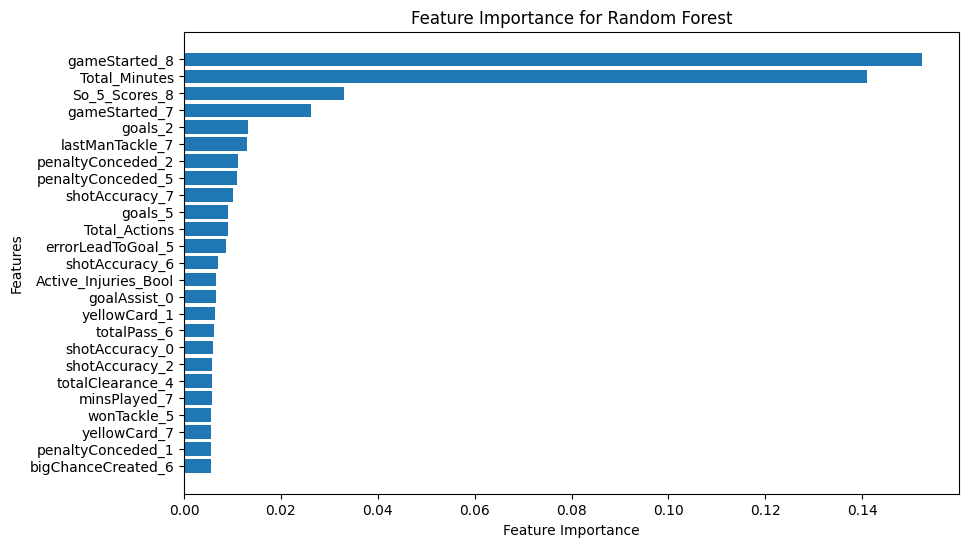

In [59]:
import matplotlib.pyplot as plt


# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

top_n = 25  # Number of top features to show
top_features = feature_importance_df.nlargest(top_n, 'Importance')

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()
plt.show()